In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
import datetime as dt
import os

### 가설 수립
1. $H_0$ : KOSPI200의 주식의 평균 수익률이 0이하이다.
2. $H_1$ : KOSPI200사의 주식의 평균 수익률이 0이상이다.

### read_csv() : csv 파일을 dataframe으로 불러오기

In [61]:
def read_csv(path,code):
    file_list=os.listdir(path)
    for i in file_list:
        if code in i:
            print('opened  :',i)
            return pd.read_csv(os.path.join(path,i))

### read_KS200_symbol() : csv파일에서 KOSPI200 종목 리스트 반환하기

In [62]:
def read_KS200_symbol(path,name):
    temp_for_sort = []
    file_path = os.path.join(path, name)
    data_list=[]
    with open(file_path, 'r', encoding='ms949') as in_file:
        for sort_line in in_file:
            sort_line=sort_line.strip('\n')
            data=sort_line.split(',')
            data_list.append(data)

    return data_list

### csv 파일 불러오기

In [60]:
data_path = './data'
KS200_name = 'KOSPI200.csv'
KS200_list=read_KS200_symbol(data_path,KS200_name)
print(len(KS200_list))
df = read_csv(data_path, KS200_list[1][0])

201
opened  : SK하이닉스000660_2015-01-01_2019-01-26.csv


### datetime으로 Date 속성변환

In [68]:
df['Date'] = pd.to_datetime(df['Date'])

### Date 열을 index로 지정

In [69]:
df.set_index('Date',inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 999 entries, 2015-01-02 to 2019-01-25
Data columns (total 6 columns):
Open      999 non-null int64
High      999 non-null int64
Low       999 non-null int64
Close     999 non-null int64
Volume    999 non-null int64
Change    999 non-null float64
dtypes: float64(1), int64(5)
memory usage: 54.6 KB


### index 확인

In [73]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [75]:
df.head(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,47950,48400,47650,47750,1155944,0.000000
2015-01-05,48050,48400,47500,47650,1409146,-0.002094
2015-01-06,47000,47600,46900,47500,1661196,-0.003148
2015-01-07,46700,47600,46700,47400,1821266,-0.002105
2015-01-08,48250,50000,47900,49950,5006675,0.053797


### 시작지점과 끝지점 지정

In [78]:
start = '20150102'
end = '20180601'

In [82]:
KSFT=df[start:end]

In [83]:
KSFT.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,47950,48400,47650,47750,1155944,0.000000
2015-01-05,48050,48400,47500,47650,1409146,-0.002094
2015-01-06,47000,47600,46900,47500,1661196,-0.003148
2015-01-07,46700,47600,46700,47400,1821266,-0.002105
2015-01-08,48250,50000,47900,49950,5006675,0.053797
2015-01-09,50700,51400,49700,49700,3313929,-0.005005
2015-01-12,50000,50500,49450,50300,1709997,0.012072
2015-01-13,48500,49650,48500,49000,3047952,-0.025845
2015-01-14,48900,49850,48850,48900,2241954,-0.002041


날짜별 수익률을 구한다.

In [84]:
price = KSFT['Close']
returns = price.pct_change()[1:]

In [85]:
price

Date
2015-01-02    47750
2015-01-05    47650
2015-01-06    47500
2015-01-07    47400
2015-01-08    49950
2015-01-09    49700
2015-01-12    50300
2015-01-13    49000
2015-01-14    48900
2015-01-15    49500
2015-01-16    47450
2015-01-19    47000
2015-01-20    47050
2015-01-21    48050
2015-01-22    47000
2015-01-23    47500
2015-01-26    48250
2015-01-27    49150
2015-01-28    49200
2015-01-29    47400
2015-01-30    47650
2015-02-02    46600
2015-02-03    46700
2015-02-04    47300
2015-02-05    47150
2015-02-06    45500
2015-02-09    45200
2015-02-10    45150
2015-02-11    46850
2015-02-12    46650
              ...  
2018-04-18    84600
2018-04-19    87900
2018-04-20    84400
2018-04-23    84400
2018-04-24    82100
2018-04-25    82400
2018-04-26    86500
2018-04-27    87100
2018-04-30    84500
2018-05-02    83100
2018-05-03    82900
2018-05-04    83000
2018-05-08    83500
2018-05-09    83400
2018-05-10    85800
2018-05-11    86100
2018-05-14    85400
2018-05-15    84600
2018-05-16    8

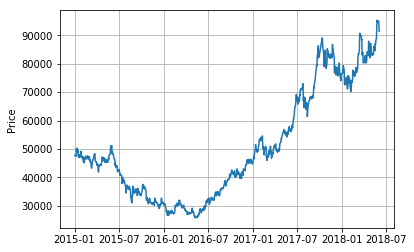

In [87]:
plt.plot(price)
plt.grid()
plt.ylabel('Price')
plt.show()

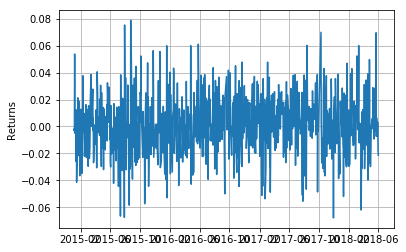

In [88]:
plt.plot(returns)
plt.grid()
plt.ylabel('Returns')
plt.show()

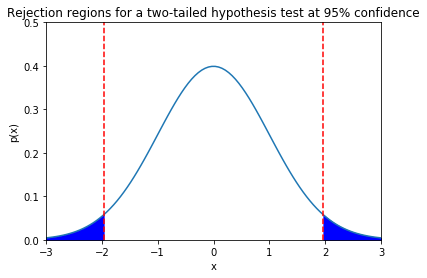

In [89]:
x = np.linspace(-3,3,100)
norm_pdf = lambda x : (1/np.sqrt(2*np.pi))* np.exp(-x * x / 2 )
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)
ax.fill_between(x, 0, y, where = x > 1.96, color='blue')
ax.fill_between(x, 0, y, where = x < -1.96, color='blue')
plt.plot([1.96,1.96],[0,0.5], 'r--')
plt.plot([-1.96,-1.96],[0,0.5], 'r--')
plt.title('Rejection regions for a two-tailed hypothesis test at 95% confidence')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xlim(-3,3)
plt.ylim(0,0.5)
plt.show()

수익률의 통계량 계산

In [90]:
n = len(returns)
test_statistic = ((returns.mean() - 0) /
                (returns.std()/np.sqrt(n-1)))
print ('t test statistic: ', test_statistic)

t test statistic:  1.3373448720489094


In [91]:
from scipy.stats import norm
p_val = (1 - norm.cdf(test_statistic,0,1))
print('P-value is: ', p_val)

P-value is:  0.0905550451347017


P-value가 0.05보다 크면, $H_0$를 기각할 수 없다. 
P-value가 0.05보다 작거나 같으면, $H_0$를 기각할 수 있다.

## 두 집단의 평균 비교
해당 회사의 주식의 평균 수익률이 시장의 평균 수익률이 다른지 검증